#### Contents

#### Histogram of Order Hour

#### Barchart of Loyalty Flags

#### Line Plot of Order Hour and Prices

#### Line Plot of Age and Number of Dependents

#### Scatterplot of Age and Income

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Dataframes

In [2]:
# Making Path do data as a string
path = r'C:\Users\bbissonette\Documents\Data Analytics Course\Acheivement 4\Instacart Basket Analysis'

In [3]:
# Importing Orders Products Merged Data Frame
ords_prods_custs = pd.read_pickle(os.path.join(path,'02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

### Step 3

In [4]:
# Checking column titles
ords_prods_custs.head()

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,number_of_dependents,marital_status,income
0,2539329,1,prior,1,2,8,NaN,196,1,0,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,prior,2,3,7,15.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,prior,3,3,12,21.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,prior,4,4,7,29.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,prior,5,4,15,28.0,196,1,1,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


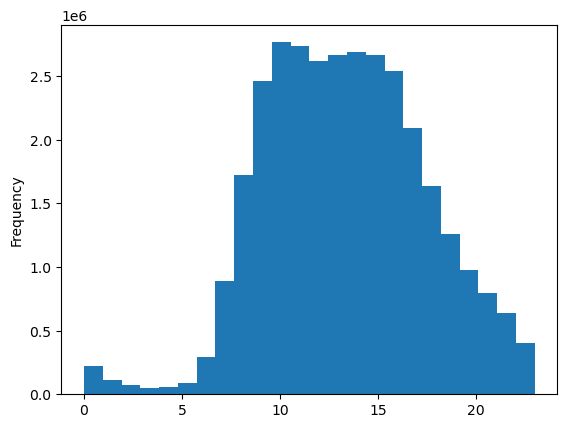

In [8]:
# Creating a Histogram on the Order Hour of Day
histogram_order_hour = ords_prods_custs['order_hour'].plot.hist(bins=24)

The histogram shows peak order occur from 10am to 4pm and taper off into the night, mostlikley as the USA goes to sleep accross te different time zones. People are most likely to order at midday, more likely to order at night, and least likely to order in the morning.

### Step 4 

In [9]:
# Checking column titles
ords_prods_custs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32433030 entries, 0 to 32433029
Data columns (total 36 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   eval_set                object  
 3   order_number            int64   
 4   orders_day_of_week      int64   
 5   order_hour              int64   
 6   days_since_prior_order  float64 
 7   product_id              int64   
 8   add_to_cart_order       int64   
 9   reordered               int64   
 10  Unnamed: 0_y            int64   
 11  product_name            object  
 12  aisle_id                int64   
 13  department_id           int64   
 14  prices                  float64 
 15  _merge                  category
 16   price_range_loc        object  
 17  price_range_loc         object  
 18  busiest_day             object  
 19  busiest_days            object  
 20  busiest_period_of_day   object  
 21  max_or

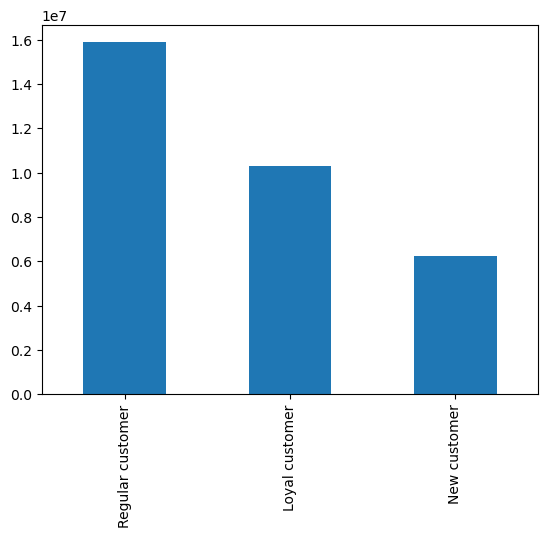

In [10]:
# To create a bar chart showing the differences in customer loyatly amounts
bar_chart_customer_loyalty = ords_prods_custs['loyalty_flag'].value_counts().plot.bar()

This bar chart shows most customers are regular customers. Loyal customers are most valuable to the company but they only hold the middle ground in terms of frequency. Instacart should develop strategies to convert customer from a regular state to a loyal state.

### Step 5

In [11]:
# Creating a Sample of the Data Frame
np.random.seed(4)
dev = np.random.rand(len(ords_prods_custs)) <= 0.7

In [12]:
# Affirming output
dev

array([False,  True, False, ...,  True, False,  True])

In [13]:
big = ords_prods_custs[dev]

In [14]:
small = ords_prods_custs[~dev]

In [15]:
len(ords_prods_custs)

32433030

In [16]:
# Checking for consistency
len(big)+len(small)

32433030

The totals match indicating the sample creation was a success

In [17]:
# Creating a unique table with columns of order hour and prices to build a line chart
sample_order_hour_prices = small[['order_hour','prices']]

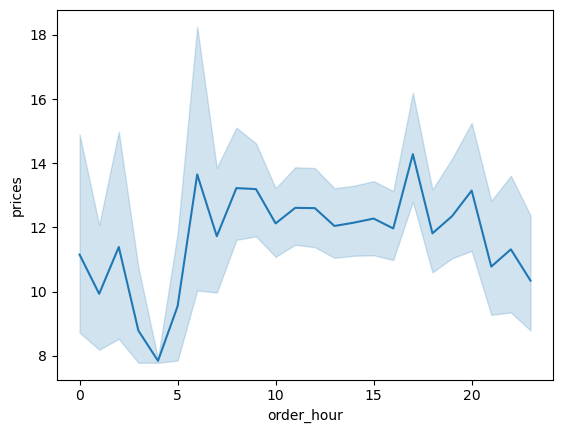

In [19]:
line_order_hour_prices = sns.lineplot(data = sample_order_hour_prices, x = 'order_hour',y = 'prices')

The line chart does not indicate any specific trend other than randomness. This means there is no strong correlation between the order_hour_of_day and prices.

### Step 6

In [21]:
# Creating a unique table from the sample to run a line chart
sample_age_number_of_dependent = small[['age','number_of_dependents']]

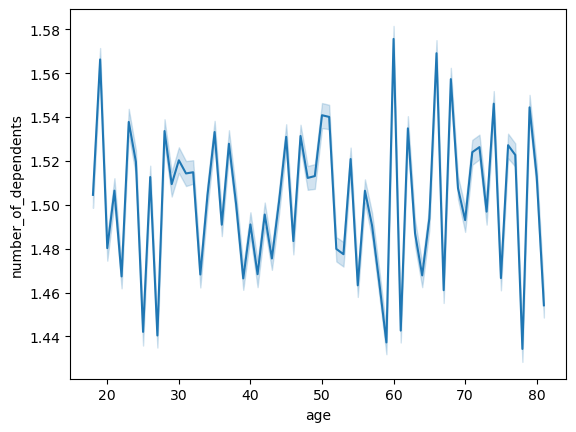

In [23]:
line_age_number_of_dependents = sns.lineplot(data = sample_age_number_of_dependent, x = 'age', y = 'number_of_dependents')

The line chart shows complete randomness with no trends. Therefore there are no connections between age and number of dependents

### Step 7

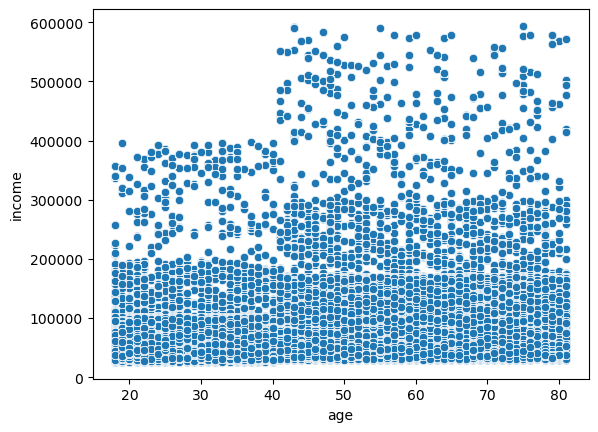

In [24]:
# To create a scatterplot determining connection between age and spending power (income)
scatter_plot_age_income = sns.scatterplot(x = 'age', y = 'income', data = ords_prods_custs)

Majority of instacart users make equal to or less than 200k annually. There is a sharp jump at the age of forty expanding the threshold of income from 400k to 600k. It is not a smooth correlation but there is evidence here to show a connection between age and buying power in a positive correlation. In general buying power before the age of 40 is most likely between 0 and 200k, then after the age of forty the buying power likely hood increases to a threshold of 300k.

### Exporting Graphs to PNG files in visualization folder

In [25]:
histogram_order_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_orders_hour.png'))

In [26]:
bar_chart_customer_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_chart_customer_loyalty.png'))

In [27]:
line_order_hour_prices.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_hour_prices.png'))

In [28]:
line_age_number_of_dependents.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_number_of_dependents.png'))

In [29]:
scatter_plot_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_plot_age_income.png'))